# Naive Bayes Classifier


**Bayes’s Theorem**


According to the Wikipedia, In probability theory and statistics,Bayes’s theorem (alternatively Bayes’s law or Bayes’s rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. Mathematically, it can be written as:


Where A and B are events and P(B)≠0

P(A|B) is a conditional probability: the likelihood of event A occurring given that B is true.
P(B|A) is also a conditional probability: the likelihood of event B occurring given that A is true.
P(A) and P(B) are the probabilities of observing A and B respectively; they are known as the marginal probability.
Let’s understand it with the help of an example:

**The problem statement:**


There are two machines which manufacture bulbs. Machine 1 produces 30 bulbs per hour and machine 2 produce 20 bulbs per hour. Out of all bulbs produced, 1 % turn out to be defective. Out of all the defective bulbs, the share of each machine is 50%. What is the probability that a bulb produced by machine 2 is defective?

We can write the information given above in mathematical terms as:

The probability that a bulb was made by Machine 1, P(M1)=30/50=0.6

The probability that a bulb was made by Machine 2, P(M2)=20/50=0.4

The probability that a bulb is defective, P(Defective)=1%=0.01

The probability that a defective bulb came out of Machine 1, P(M1 | Defective)=50%=0.5

The probability that a defective bulb came out of Machine 2, P(M2 | Defective)=50%=0.5

Now, we need to calculate the probability of a bulb produced by machine 2 is defective i.e., P(Defective | M2). Using the Bayes Theorem above, it can be written as:



Substituting the values, we get:


Task for you is to calculate the probability that a bulb produced by machine 1 is defective.

We’ll extend this same understanding to understand the Naïve Baye’s Algorithm.

**Algorithm steps:**


Let’s consider that we have a binary classification problem i.e., we have two classes in our data as shown below.
2. Now suppose if we are given with a new data point, to which class does that point belong to?3. The formula for a point ‘X’ to belong in class1 can be written as:Where the numbers represent the order in which we are going to calculate different probabilities. 4. A similar formula can be utilised for class 2 as well. 5. Probability of class 1 can be written as:


 6. For calculating the probability of X, we draw a circle around the new point and see how many points(excluding the new point) lie inside that circle.
The points inside the circle are considered to be similar points.


 7. Now, we need to calculate the probability of a point to be in the circle that we have made given that it’s of class 1.


 8. We can substitute all the values into the formula in step 3. We get:

 9. And if we calculate the probability that X belongs to Class2, we’ll get 0.69. It means that our point belongs to class 2.

The Generalization for Multiclass:
The approach discussed above can be generalised for multiclass problems as well. Suppose, P1, P2, P3…Pn are the probabilities for the classes C1,C2,C3…Cn, then the point X will belong to the class for which the probability is maximum. Or mathematically the point belongs to the result of :

The Difference
You can notice a major difference in the way in which the Naïve Bayes algorithm works form other classification algorithms. It does not first try to learn how to classify the points. It directly uses the label to identify the two separate classes and then it predicts the class to which the new point shall belong.

Why it is called Naïve Bayes?
The entire algorithm is based on Bayes’s theorem to calculate probability. So, it also carries forward the assumptions for the Bayes’s theorem. But those assumptions(that the features are independent) might not always be true when implemented over a real-world dataset. So, those assumptions are considered Naïve and hence the name.

Gaussian Naive Bayes
When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution. Go back to the normal distribution lecture to review the formulas for the Gaussian/Normal Distribution.

For example of using the Gaussian Distribution, suppose the training data contain a continuous attribute, x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let μc be the mean of the values in x associated with class c, and let σ2c be the variance of the values in x associated with class c. Then, the probability distribution of some value given a class, p(x=v|c), can be computed by plugging v into the equation for a Normal distribution parameterized by μc and σ2c. That is:



**Python Implementation**

In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [6]:
pip install scikit-plot


In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/preetiiiiiish/Datasets/main/pima-indians-diabetes-2.csv")

In [8]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
df.rename(columns={'Preg': 'Pregnancy', 'Plas': 'Glucose', 'Pres': 'BloodPressure', 'skin': 'SkinThickness', 'test': 'Insulin', 'mass': 'BMI', 'pedi': 'DiabetesPedigreeFunction', 'age': 'Age', 'class': 'Outcome'}, inplace=True)


In [10]:
df.head(10)

,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
df.shape

(768, 9)

In [12]:
df.isnull().sum()

Pregnancy                   0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.describe(include="all")

,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.dtypes

Pregnancy                     int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Handling Missing values

In [19]:
## trating 0 or missing values
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome', ylabel='count'>

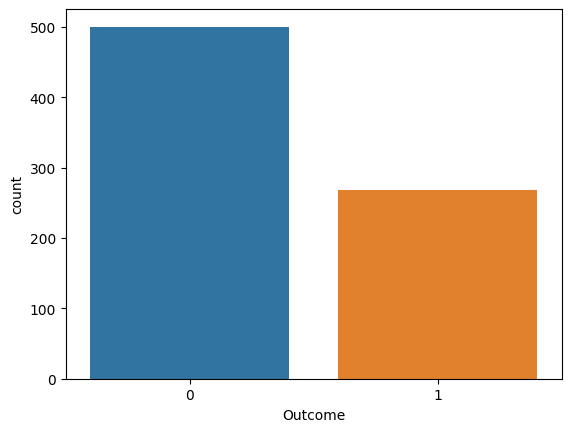

In [17]:
sns.countplot(x="Outcome",data=df)

In [47]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

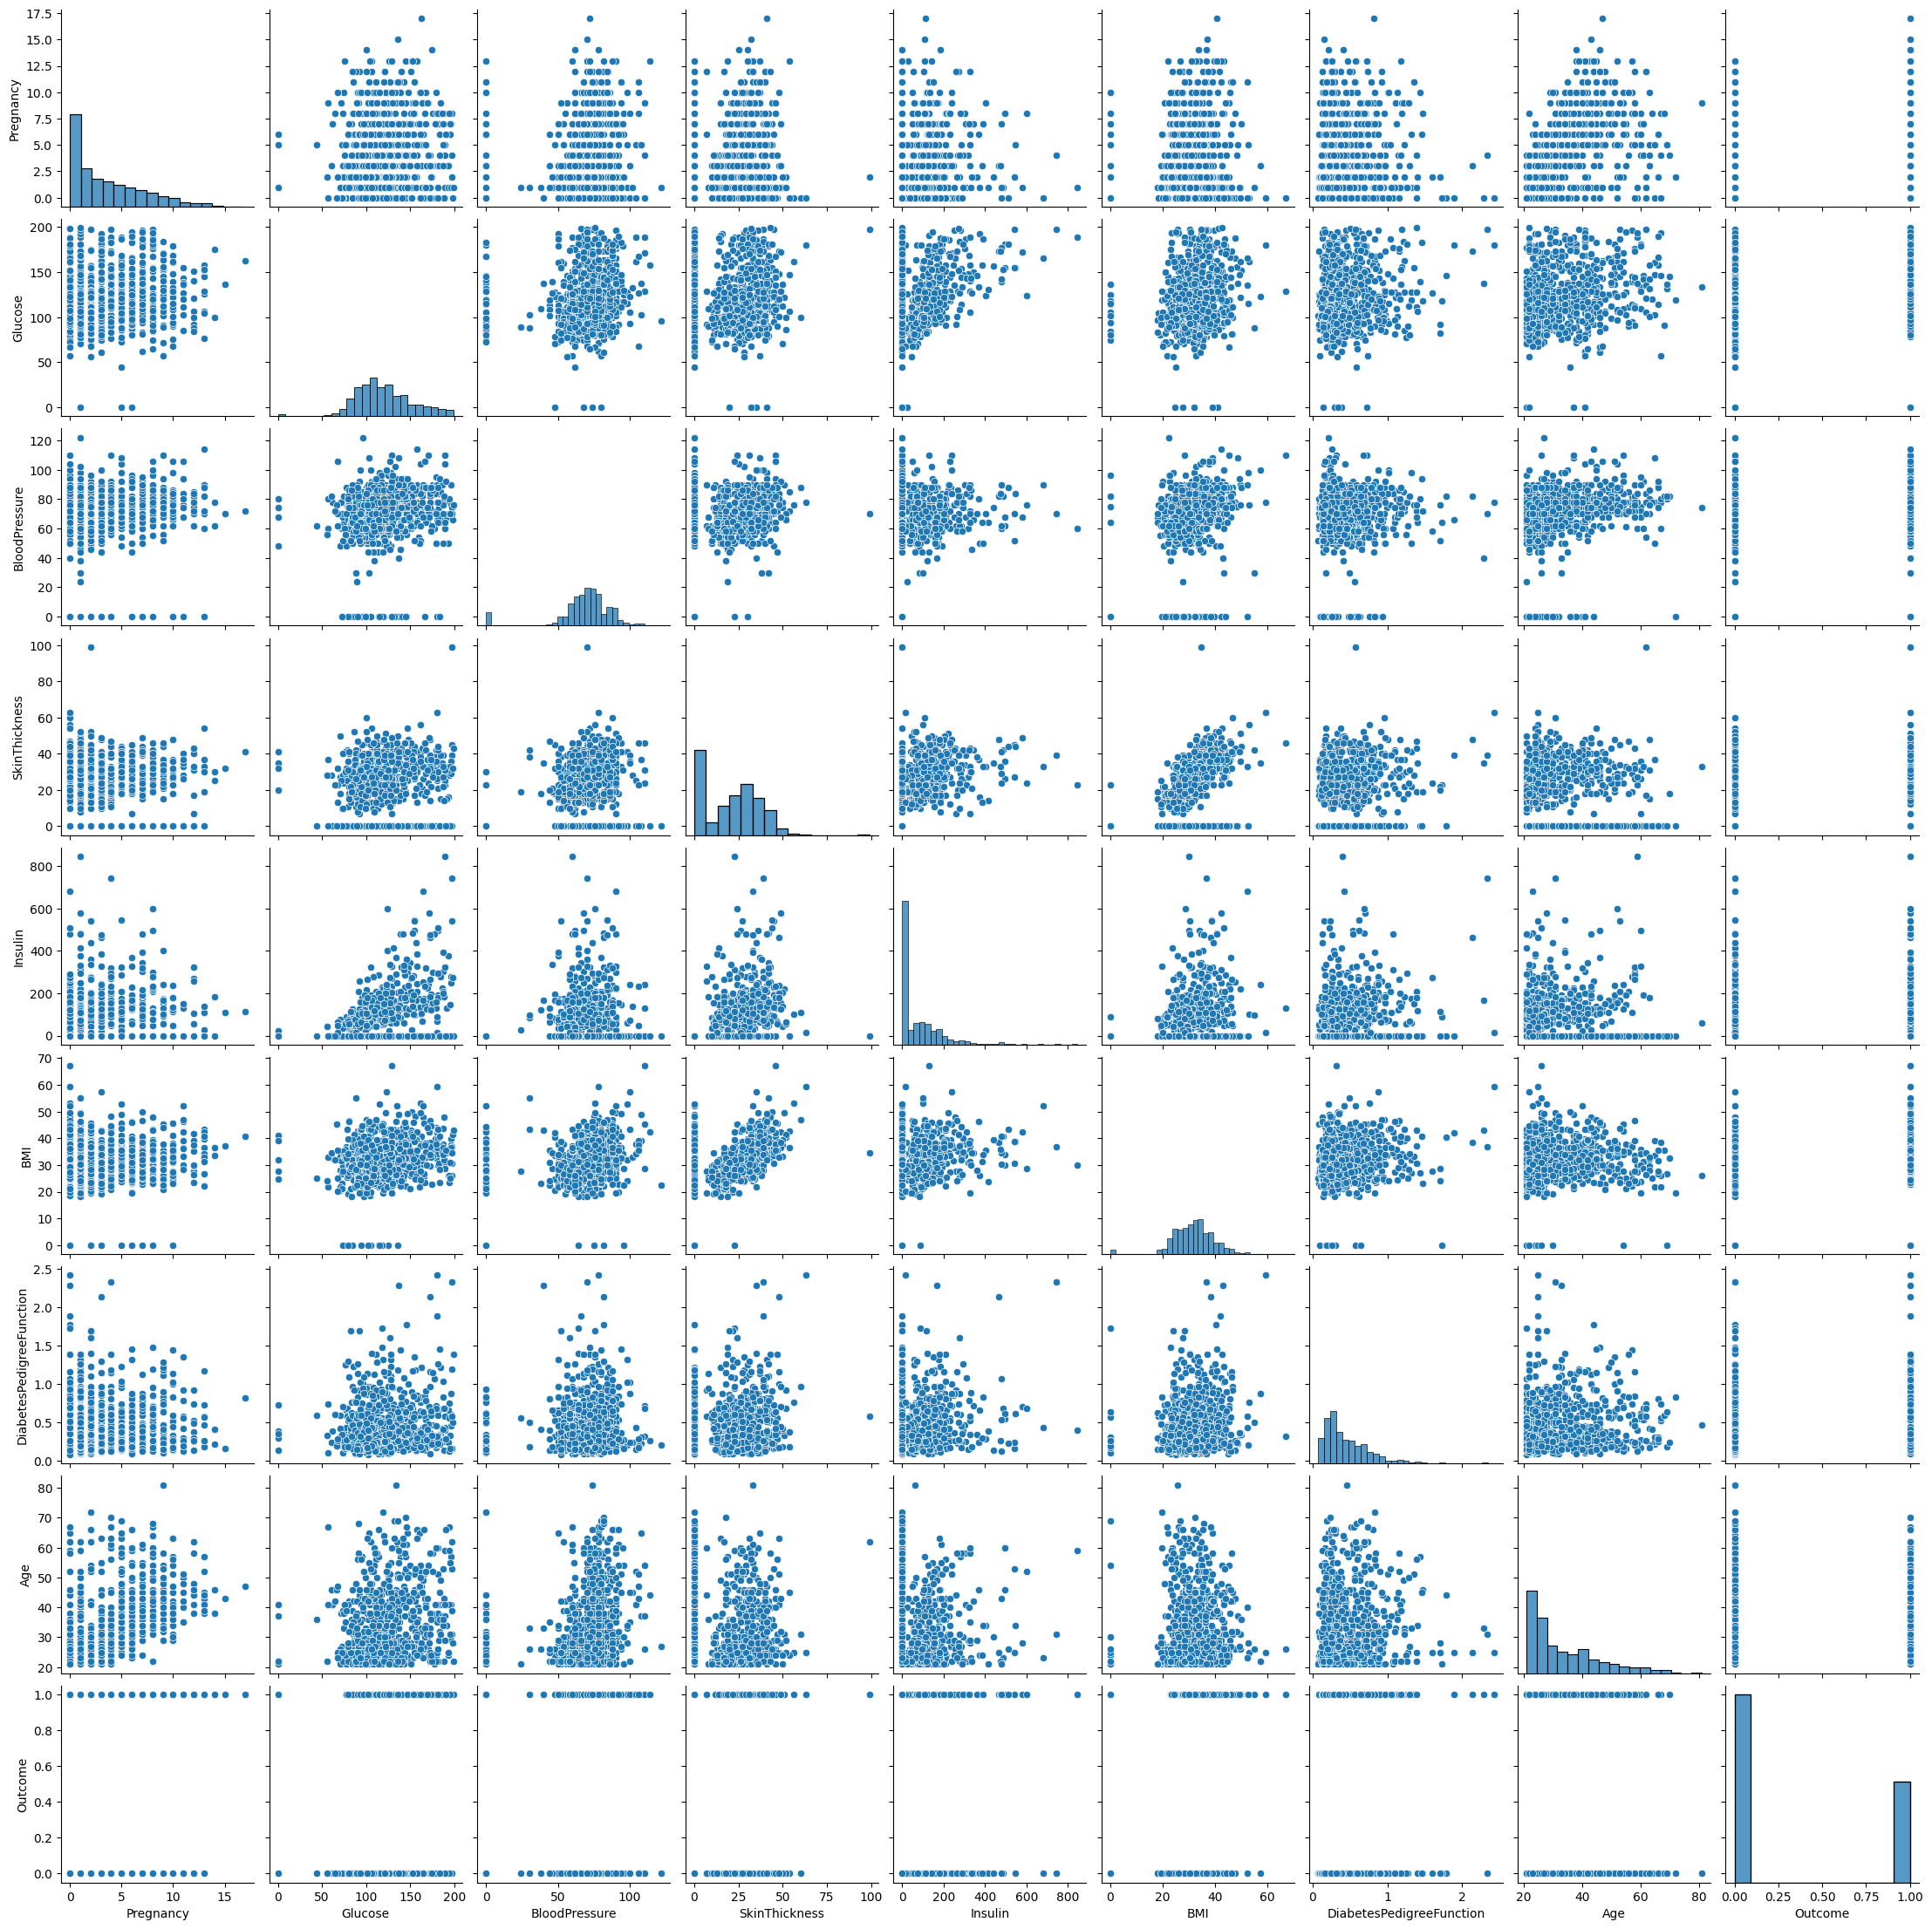

In [18]:
sns.pairplot(df)
plt.show()

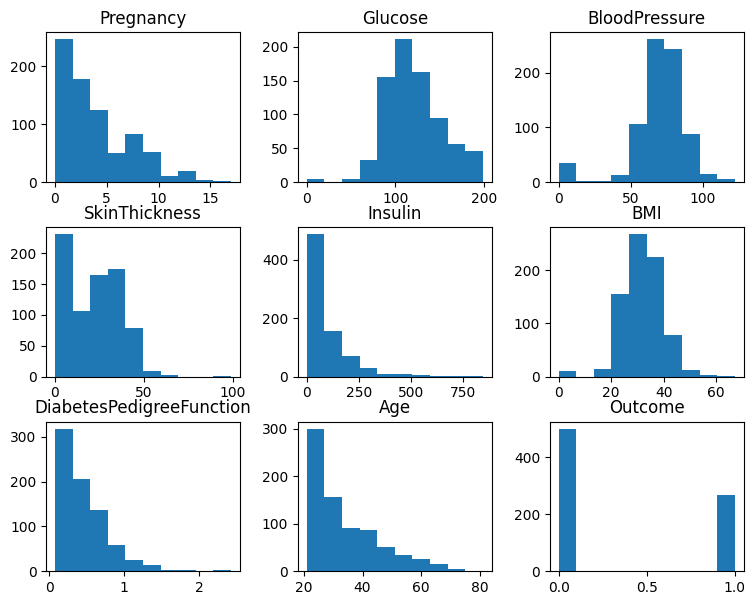

In [16]:
df.hist(figsize=(9,7),grid=False)
plt.show()

Though there are no apparet null values in the dataset and it looks clean but looking at decribe function it can be seen that there are certain values that are 0.

In [20]:
df.describe(include="all")

,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Model Building and Evaluation

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score


In [22]:
x=df.drop("Outcome" ,axis =1)
y=df[("Outcome")]

In [23]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.30, random_state=42)

In [24]:
nb_model=GaussianNB()

In [25]:
nb_model.fit(x_train,y_train)

GaussianNB()

In [52]:
nb_model.score(x_train,y_train)

0.6554934823091247

In [51]:
nb_model.score(x_test,y_test)

0.670995670995671

# `APPROACH 2`

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [31]:
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=42)

In [37]:
nb_model_stand=GaussianNB()

In [39]:
nb_model_stand.fit(x_train,y_train)

GaussianNB()

In [40]:
nb_model_stand.score(x_train,y_train)

0.7560521415270018

In [41]:
nb_model_stand.score(x_test,y_test)

0.7402597402597403

In [53]:
y_pred = nb_model_stand.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [57]:
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Confusion Matrix:
[[120  31]
 [ 29  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [46]:
print("Naive Bayes accuracy: {:.2f}%".format(nb_model_stand.score(x_test,y_test)*100))

Naive Bayes accuracy: 74.03%
